In [514]:
import pandas as pd
from pymongo import MongoClient
import plotly
# plotly.offline.init_notebook_mode(connected=True)
plotly.io.renderers.default= 'png'
import plotly.express as px
from datetime import datetime
from dateutil.relativedelta import relativedelta

def _connect_mongo(host, port, username, password, db):
    """ A util for making a connection to mongo """

    if username and password:
        mongo_uri = 'mongodb://%s:%s@%s:%s/%s' % (username, password, host, port, db)
        conn = MongoClient(mongo_uri)
    else:
        conn = MongoClient(host, port)


    return conn[db]

db = _connect_mongo(host='localhost', port=27017, username=None, password=None, db='OpenRoadDB_20211124')

KPI = db.kpi
ENGINE = db.engine
ENGINE_HISTORY = db.engine_history

# run_id_meta = {
#     '8dWRT31cwaoF': 'Greedy Pickup',
#     'EvvsL6wzI8oB': 'Greedy Revenue',
# #     '': 'Greedy Service',
#     'iWuf33bxKkzv': 'Compromise',

# } # 20211117_D300_P5000_8Hx30s

# run_id_meta = {
#     'iaP7xfz1KO7K': 'Greedy Pickup',
#     'aqzeZNrBDg9a': 'Greedy Revenue',
#     # 'nEi0YDREQCEo': 'Compromise 1',
#     # 'GEHX2RsJ0mo9': 'Compromise 2',
#     'giEW0FeOagNe': 'Compromise 3'

# } # Comfort Data Set Sampled (10p 15d)

run_id_meta = {
    '5xUTjS4ULrvR': 'Pickup Optimal',
    'TJpoqlSINNyY': 'Revenue Optimal',
    # 'VkKlAlTkhNCh': 'Service Optimal',
    # 'gakliogIKN47': 'Compromise (time scale)',
    # 'AvJqRagQsUfl': 'Compromise (demand scale) 1',
    # 'MsYG0zsXrm5Q': 'Compromise (demand scale) 2',
    'AQVwNgaQiFiv': 'Compromise (demand scale) Prop',


} # Comfort Data Set Sampled (10p 15d)


# run_id_meta = {
#     # '': 'Pickup Optimal',
#     # '': 'Revenue Optimal',
#     # '': 'Service Optimal',
#     # '': 'Compromise (demand scale) Prop',
# } # Comfort Data Set Sampled (10p 25d)




# plotly.io.renderers


In [509]:
# cursor = db.engine_history.find({
#             'run_id': 'xSx0cwH3JgTH',
#         },
#         projection={ '_id': 0, 'online_params.realtime_reverse_pickup_time_step': 1},
#         sort=[('online_params.realtime_reverse_pickup_time_step', -1)]
#     )

# list(cursor)

In [510]:
def get_pivot(collection, run_id_meta, metric):
    cursor = collection.find({
            'run_id': {'$in': [k for k, _ in run_id_meta.items()]},
            'metric': metric
        },
        projection={ '_id': 0, 'run_id': 1, 'sim_clock': 1, 'value': 1,},
        sort=[('sim_clock', 1)]
    )

    metric_df = pd.DataFrame(list(cursor))

    metric_pivot = pd.pivot_table(metric_df, 
                                  index='sim_clock', 
                                  columns='run_id', 
                                  values='value').rename(columns=run_id_meta)
    cumulative_pivot = metric_pivot.cumsum()

    return metric_pivot, cumulative_pivot



def get_engine_perf(collection, run_id_list):
    cursor = collection.find({
            'run_id': {'$in': run_id_list},
        },
        projection={ '_id': 0, 'online_params': 1, 'sim_clock': 1, 'runtime_performance': 1,},
        sort=[('sim_clock', 1)]
    )

    metric_df = pd.DataFrame(list(cursor))
    metric_df = pd.concat([metric_df.drop(['online_params'], axis=1), metric_df['online_params'].apply(pd.Series)], axis=1)
    metric_df = pd.concat([metric_df.drop(['runtime_performance'], axis=1), metric_df['runtime_performance'].apply(pd.Series)], axis=1)

    metric_df

    return metric_df





In [511]:
sum_metric = [
    'served', 
    'cancelled',
    'revenue', 
    'wait_time_pickup',
    'service_score'
]
avg_metric_byServed = [
    'revenue', 
    'wait_time_pickup',
    # 'wait_time_driver_confirm', 
    # 'wait_time_assignment',
    'service_score'
]



gamma = 1.2
# Sum(Revenue) / num_steps / Scale_factor
# Scale_factor as needed for normalization
# Data from Greedy_revenue Scenario
# target_revenue = 59671.3 * gamma / 960 / 1
# target_revenue = 59671.3 * gamma / 4400 / 1
target_revenue = 59671.3 * gamma / 3125 / 1
print(f"{target_revenue=}")


# Sum(pickup_budget) - Sum(pickup_time) / num_steps / Scale_factor
# Scale_factor as needed for normalization
# Data from Greedy_pickup Scenario
# Budget Computed by max Pickup (600) * Num_Served 
# target_pickup_time = ((600*4236) - (1802160.0)) * gamma / 960 / 10
target_pickup_time = ((600*4236) - (1802160.0)) * gamma / 4400 / 10
print(f"{target_pickup_time=}")

# Sum(service_score) / num_steps / Scale_factor
# Scale_factor as needed for normalization
# Data from Greedy_service Scenario
# target_service = 318697.0 * 1 / 960 / 5
target_service = 318697.0 * 1 / 4400 / 5
print(f"{target_service=}")



target_revenue=22.9137792
target_pickup_time=20.166545454545453
target_service=14.486227272727273


run_id               Pickup Optimal  Compromise (demand scale) Prop  \
sim_clock                                                             
2020-01-01 15:59:30          4326.0                          4171.0   

run_id               Revenue Optimal  
sim_clock                             
2020-01-01 15:59:30           3125.0  


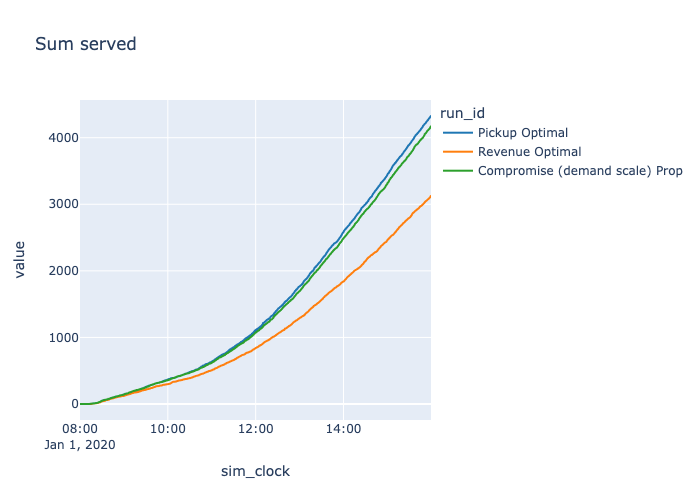

run_id               Pickup Optimal  Compromise (demand scale) Prop  \
sim_clock                                                             
2020-01-01 15:59:30          2421.0                          2582.0   

run_id               Revenue Optimal  
sim_clock                             
2020-01-01 15:59:30           3616.0  


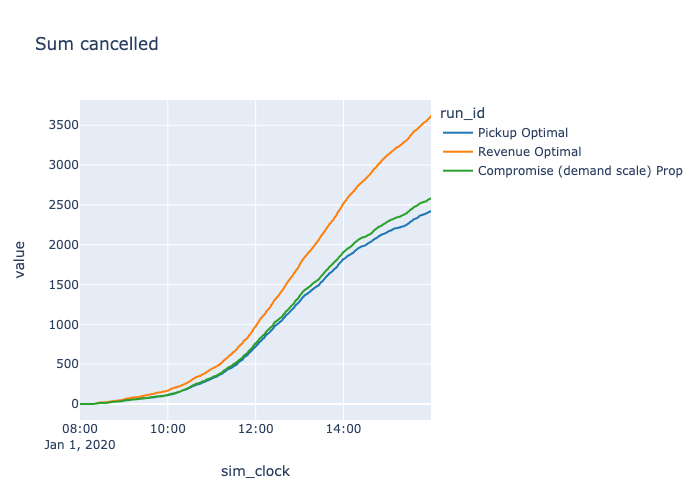

run_id               Pickup Optimal  Compromise (demand scale) Prop  \
sim_clock                                                             
2020-01-01 15:59:30        59858.02                        60123.61   

run_id               Revenue Optimal  
sim_clock                             
2020-01-01 15:59:30          59671.3  


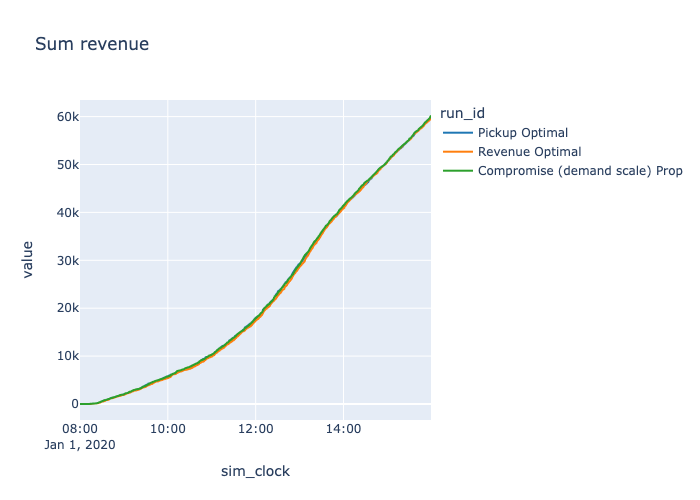

run_id               Pickup Optimal  Compromise (demand scale) Prop  \
sim_clock                                                             
2020-01-01 15:59:30       1802160.0                       1743240.0   

run_id               Revenue Optimal  
sim_clock                             
2020-01-01 15:59:30        1786020.0  


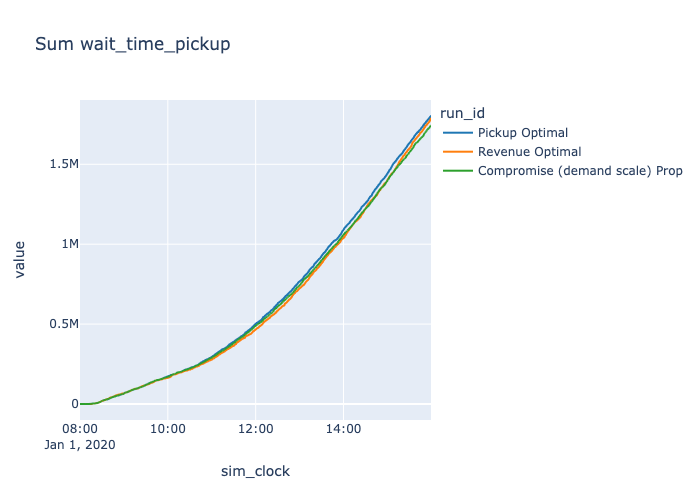

run_id               Pickup Optimal  Compromise (demand scale) Prop  \
sim_clock                                                             
2020-01-01 15:59:30        318697.0                        305544.0   

run_id               Revenue Optimal  
sim_clock                             
2020-01-01 15:59:30         230390.0  


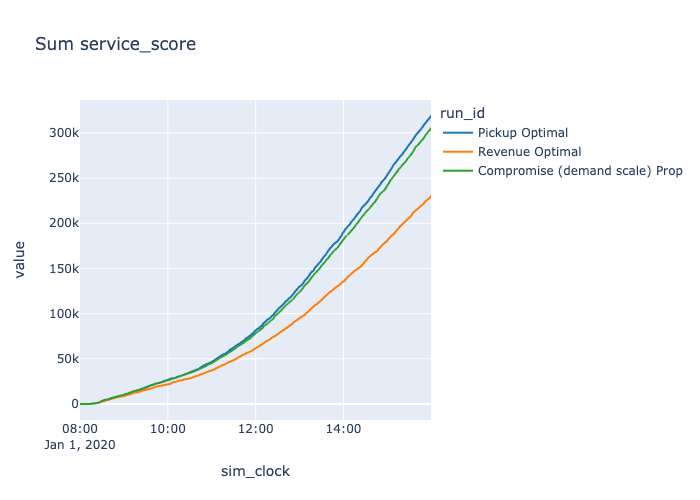

run_id               Pickup Optimal  Compromise (demand scale) Prop  \
sim_clock                                                             
2020-01-01 15:59:30       13.836805                       14.414675   

run_id               Revenue Optimal  
sim_clock                             
2020-01-01 15:59:30        19.094816  


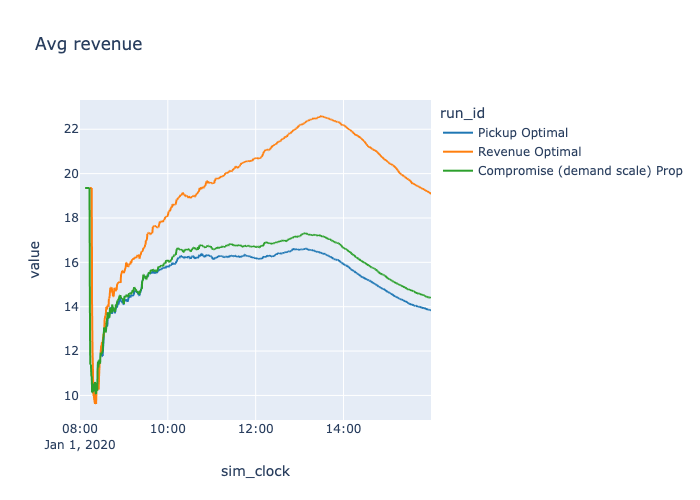

run_id               Pickup Optimal  Compromise (demand scale) Prop  \
sim_clock                                                             
2020-01-01 15:59:30      416.588072                      417.942939   

run_id               Revenue Optimal  
sim_clock                             
2020-01-01 15:59:30         571.5264  


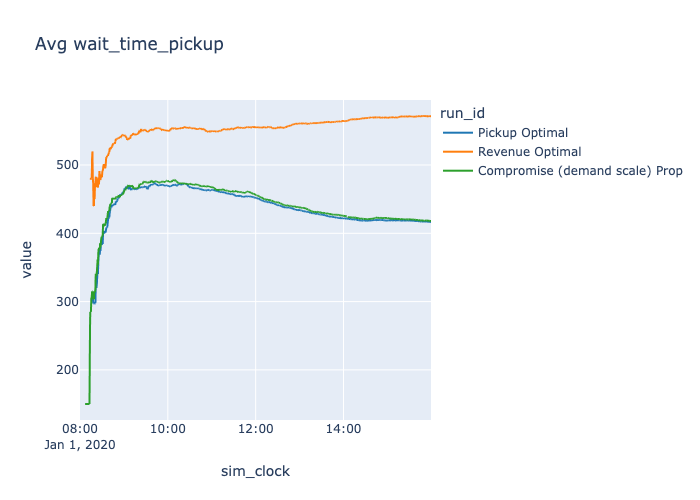

run_id               Pickup Optimal  Compromise (demand scale) Prop  \
sim_clock                                                             
2020-01-01 15:59:30       73.670134                       73.254375   

run_id               Revenue Optimal  
sim_clock                             
2020-01-01 15:59:30          73.7248  


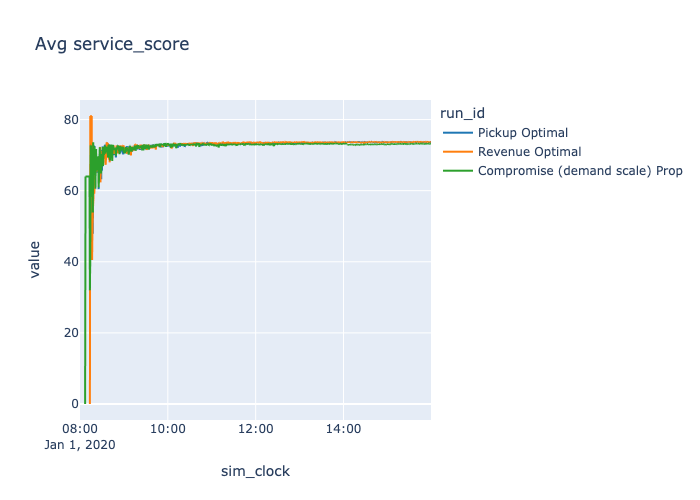

In [517]:
from IPython.display import Image

for m in sum_metric:
    metric_pivot, cum_pivot = get_pivot(KPI, run_id_meta, m)
    print(cum_pivot.tail(1))

    fig = px.line(cum_pivot, title=f"Sum {m}",
                 color_discrete_sequence=px.colors.qualitative.D3,
                 category_orders={'run_id': [v for _, v in run_id_meta.items()]}) 
    fig.show()


served_pivot, cum_served_pivot = get_pivot(KPI, run_id_meta, 'served')
for m in avg_metric_byServed:
    metric_pivot, cum_pivot = get_pivot(KPI, run_id_meta, m)
    metric_pivot = metric_pivot / served_pivot
    cum_pivot = cum_pivot / cum_served_pivot
    print(cum_pivot.tail(1))

    fig = px.line(cum_pivot, title=f"Avg {m}",
                 color_discrete_sequence=px.colors.qualitative.D3,
                 category_orders={'run_id': [v for _, v in run_id_meta.items()]}) 
    fig.show()


    

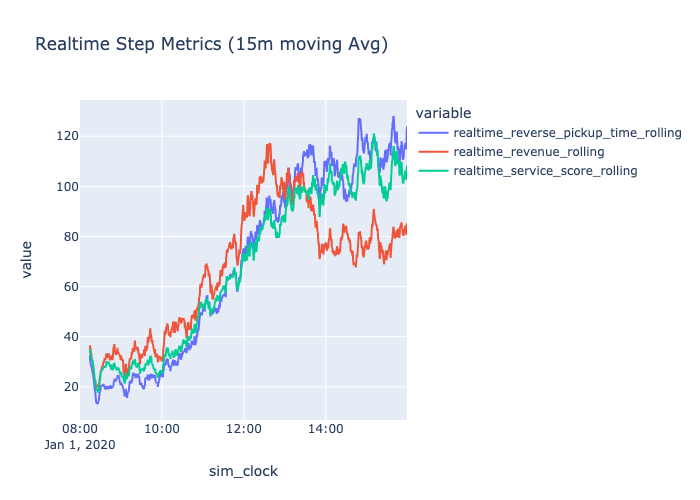

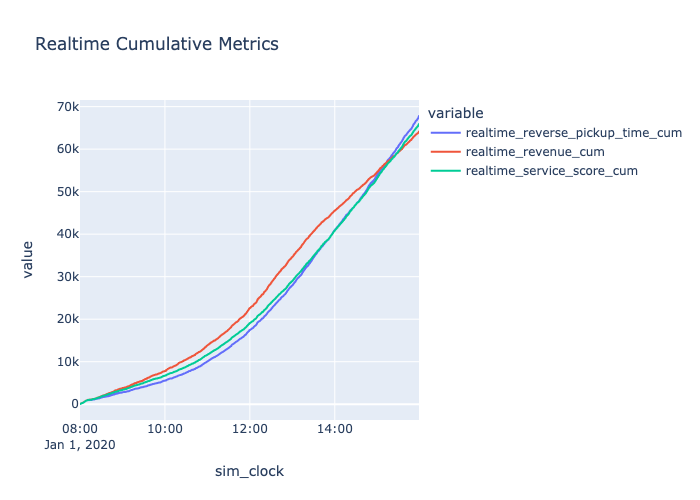

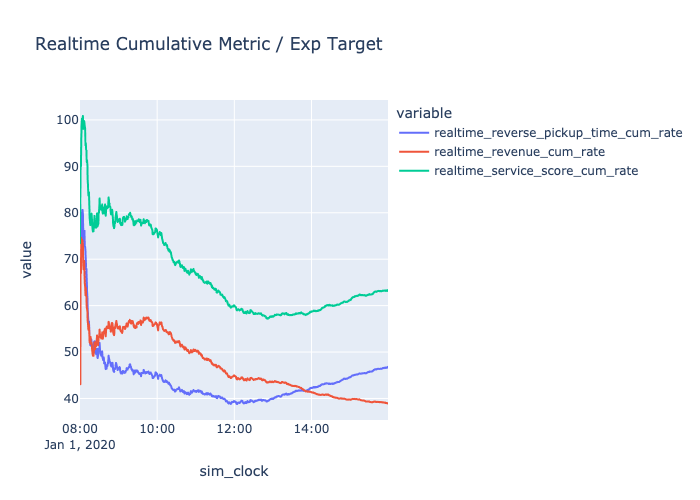

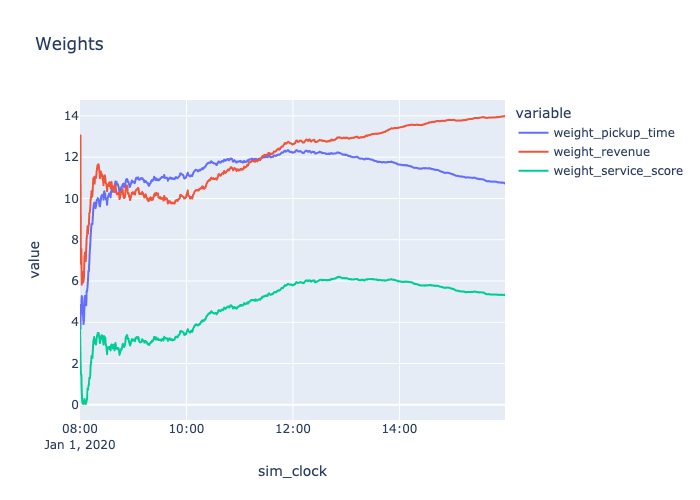

In [518]:
# engine_df = get_engine_perf(ENGINE_HISTORY, [k for k, v in run_id_meta.items() if v == 'Pickup Optimal'])
# engine_df = get_engine_perf(ENGINE_HISTORY, [k for k, v in run_id_meta.items() if v == 'Revenue Optimal'])
# engine_df = get_engine_perf(ENGINE_HISTORY, [k for k, v in run_id_meta.items() if v == 'Service Optimal'])
# engine_df = get_engine_perf(ENGINE_HISTORY, [k for k, v in run_id_meta.items() if v == 'Compromise (time scale)'])
# engine_df = get_engine_perf(ENGINE_HISTORY, [k for k, v in run_id_meta.items() if v == 'Compromise (demand scale) 1'])
engine_df = get_engine_perf(ENGINE_HISTORY, [k for k, v in run_id_meta.items() if v == 'Compromise (demand scale) Prop'])




engine_df['realtime_reverse_pickup_time_cum_rate'] = 100* engine_df['realtime_reverse_pickup_time_cum'] / engine_df['exp_target_reverse_pickup_time']
engine_df['realtime_revenue_cum_rate'] = 100* engine_df['realtime_revenue_cum'] / engine_df['exp_target_revenue']
engine_df['realtime_service_score_cum_rate'] = 100* engine_df['realtime_service_score_cum'] / engine_df['exp_target_service_score']

engine_df[['realtime_reverse_pickup_time_rolling',
         'realtime_revenue_rolling', 
         'realtime_service_score_rolling']] = engine_df[['realtime_reverse_pickup_time_step',
                                                 'realtime_revenue_step', 
                                                 'realtime_service_score_step']].rolling(30).mean()
# fig = px.line(engine_df, x='sim_clock', 
#               y=['realtime_reverse_pickup_time_rate','realtime_revenue_rate', 'realtime_service_score_rate',
#                 ],
#               title='Compromise') #, labels = run_id_meta)
# fig.show()
fig = px.line(engine_df, 
              x='sim_clock', 
              y=['realtime_reverse_pickup_time_rolling',
                 'realtime_revenue_rolling', 
                 'realtime_service_score_rolling',
                ],
              title='Realtime Step Metrics (15m moving Avg)') #, labels = run_id_meta)
fig.show()

fig = px.line(engine_df, x='sim_clock', 
              y=['realtime_reverse_pickup_time_cum',
                 'realtime_revenue_cum',
                 'realtime_service_score_cum',
                ],
              title='Realtime Cumulative Metrics') #, labels = run_id_meta)
fig.show()

fig = px.line(engine_df, x='sim_clock', 
              y=['realtime_reverse_pickup_time_cum_rate',
                 'realtime_revenue_cum_rate', 
                 'realtime_service_score_cum_rate',
                ],
              title='Realtime Cumulative Metric / Exp Target') #, labels = run_id_meta)
fig.show()

fig = px.line(engine_df, x='sim_clock', 
              y=['weight_pickup_time',
                 'weight_revenue', 
                 'weight_service_score',
                ],
              title='Weights') #, labels = run_id_meta)
fig.show()





In [474]:
# engine_df.tail(100)